# Clasificación en Aprendizaje Supervisado

## Introducción a la Clasificación

### Teoría

La clasificación es una tarea de aprendizaje supervisado donde el objetivo es predecir etiquetas de clase discretas y desordenadas para nuevas instancias. Existen dos tipos principales:

- **Clasificación binaria**: Dos clases (ej: spam/no spam)
- **Clasificación multiclase**: Más de dos clases (ej: tipos de flores)

Los algoritmos se dividen en:

- **Modelos lineales**: Regresión logística, SVM lineal, Naïve Bayes
- **Modelos no lineales**: $k-$*NN*, Árboles de Decisión, *Random Forest*, `MLP`

### Métricas de Evaluación

Para evaluar clasificadores usamos:

- **Matriz de confusión**: TP, FP, FN, TN
- **Precisión**: $\frac{TP}{TP + FP}$
- **Recall**: $\frac{TP}{TP + FN}$
- **F1-score**: Media armónica de precisión y recall: $F1 = 2 \times \frac{precisión \times recall}{precisión + recall}$
- **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN}$



## Regresión Logística

### Teoría
La regresión logística modela la probabilidad de pertenencia a una clase usando la función sigmoide:

$$P(y=1|x) = \frac{1}{1 + e^{-(w^Tx + b)}}$$

Donde:
- $w$: vector de pesos
- $b$: término de sesgo
- $x$: vector de características

### Ejemplo

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.99      1.00      0.99        87

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200


Matriz de confusión:
[[112   1]
 [  0  87]]

Accuracy: 0.9950


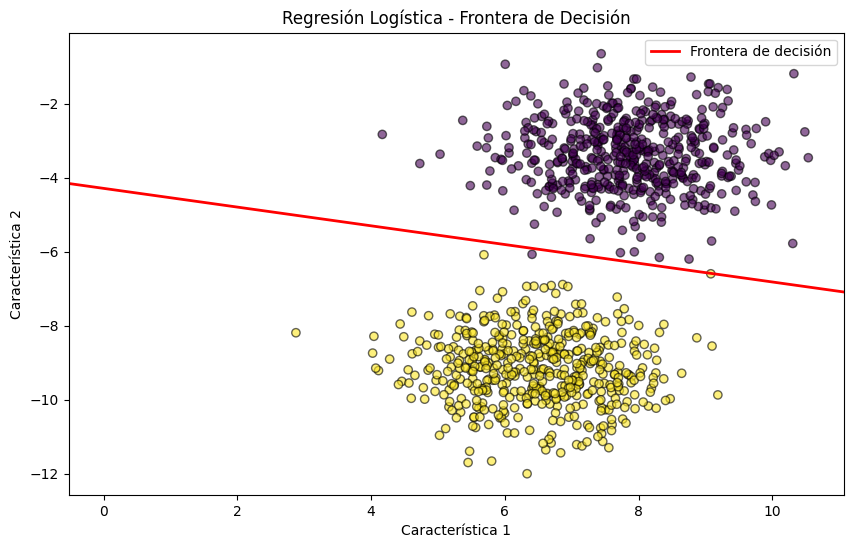

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Generar datos sintéticos
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=6)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"\nAccuracy: {model.score(X_test, y_test):.4f}")

# Visualizar frontera de decisión
m = -model.coef_[0][0] / model.coef_[0][1]
x1 = (0, -model.intercept_[0] / model.coef_[0][1])

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolors='k')
plt.axline(xy1=x1, slope=m, color='red', linewidth=2, label='Frontera de decisión')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Regresión Logística - Frontera de Decisión')
plt.show()


#### Explicación del Código

1. **`make_blobs`**: Genera datos sintéticos con distribución gaussiana
   - `n_samples`: Número de muestras
   - `centers`: Número de centros/clusters
   - `n_features`: Número de características
   - `random_state`: Semilla para reproducibilidad

2. **`train_test_split`**: Divide datos en entrenamiento (80%) y prueba (20%)
   - `test_size`: Proporción para prueba
   - `random_state`: Semilla para reproducibilidad

3. **`LogisticRegression`**: Implementa regresión logística
   - Parámetros por defecto: `penalty='l2'`, `C=1.0`

4. **`model.coef_` y `model.intercept_`**: Contienen los parámetros del modelo
   - `coef_`: Coeficientes $w$ de la frontera de decisión
   - `intercept_`: Término de sesgo $b$

#### Parámetros Clave de `LogisticRegression`
- **`C`**: Inverso de la fuerza de regularización (valores más pequeños = más regularización)
- **`penalty`**: Tipo de regularización ('l1', 'l2', 'elasticnet', 'none')
- **`solver`**: Algoritmo de optimización ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
- **`max_iter`**: Número máximo de iteraciones

### Notas de Examen
- La regresión logística es un **modelo lineal** para clasificación
- Usa la **función sigmoide** para mapear valores a probabilidades [0,1]
- La frontera de decisión es **lineal**: $w^Tx + b = 0$
- Se optimiza mediante **máxima verosimilitud**
- Es sensible a características no lineales (necesita transformaciones)


## Máquinas de Vectores de Soporte (SVM) Lineales

### Teoría

Las SVM buscan el hiperplano que maximiza el margen entre clases:

$$\min_{w,b} \frac{1}{2}||w||^2 + C\sum_{i=1}^n \xi_i$$
sujeto a: $y_i(w^Tx_i + b) \geq 1 - \xi_i$, $\xi_i \geq 0$

Donde:
- $w$: vector normal al hiperplano
- $C$: parámetro de regularización
- $\xi_i$: variables de holgura

### Ejemplo

Matriz de confusión:
[[91  5]
 [66 38]]

Precisión: 0.8837
Accuracy: 0.6450


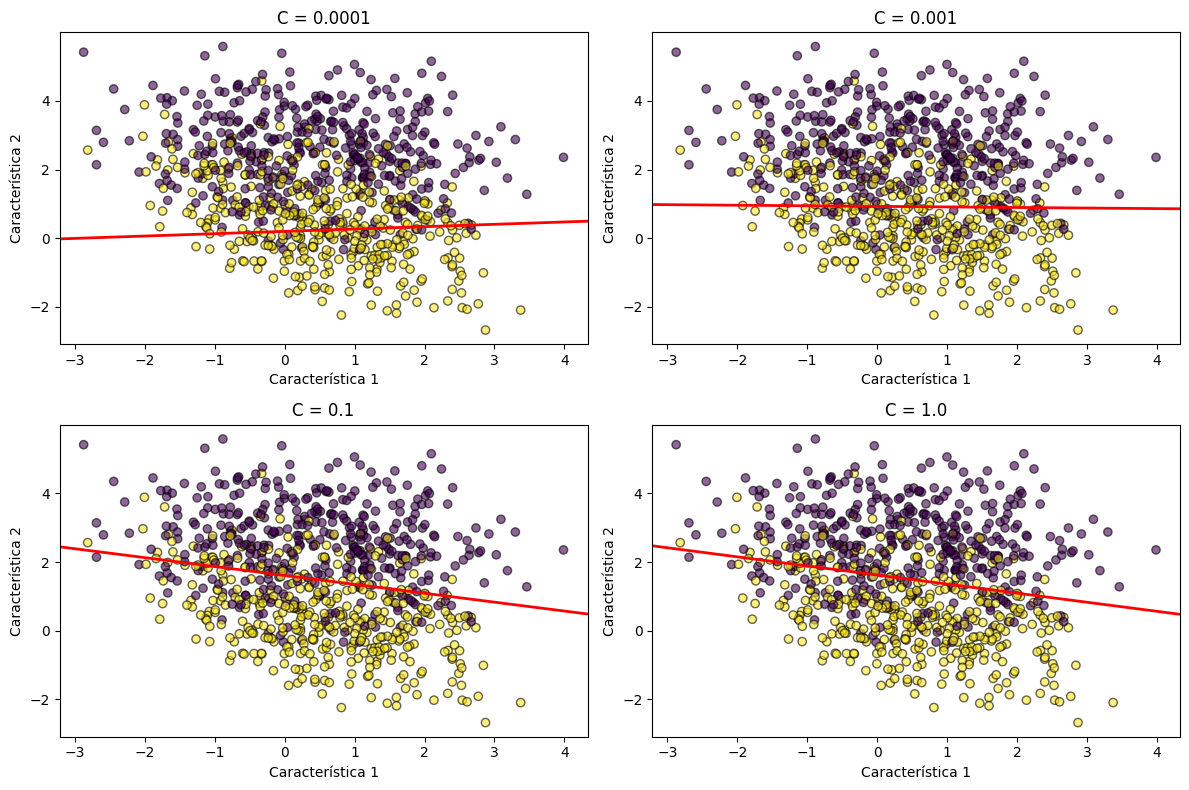

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score

# Generar datos sintéticos
X, y = make_classification(
    n_samples=1000, 
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=2023,
    n_clusters_per_class=1
)

# Añadir ruido
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar SVM lineal
model = LinearSVC(C=0.0001, random_state=0)
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"\nPrecisión: {precision_score(y_test, y_pred):.4f}")
print(f"Accuracy: {model.score(X_test, y_test):.4f}")

# Visualizar efecto del parámetro C
Cs = [0.0001, 0.001, 0.1, 1.0]
plt.figure(figsize=(12, 8))

for idx, C in enumerate(Cs):
    model = LinearSVC(C=C, random_state=0)
    model.fit(X_train, y_train)
    
    m = -model.coef_[0][0] / model.coef_[0][1]
    x1 = (0, -model.intercept_[0] / model.coef_[0][1])
    
    ax = plt.subplot(2, 2, idx + 1)
    ax.set_title(f"C = {C}")
    ax.axline(xy1=x1, slope=m, color='red', linewidth=2)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.6, edgecolors='k')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

#### Explicación del Código

1. **`make_classification`**: Genera datos de clasificación sintéticos
   - `n_informative`: Características informativas
   - `n_redundant`: Características redundantes/linealmente dependientes

2. **`LinearSVC`**: SVM lineal para clasificación
   - `C`: Parámetro de regularización (bajo = más regularización)

3. **Visualización del efecto de C**:
   - **C pequeño**: Margen grande, posible subajuste
   - **C grande**: Margen pequeño, posible sobreajuste

#### Parámetros Clave de `LinearSVC`
- **`C`**: Controla el trade-off entre margen y errores (default=1.0)
- **`loss`**: Función de pérdida ('hinge', 'squared_hinge')
- **`max_iter`**: Número máximo de iteraciones
- **`tol`**: Tolerancia para criterio de parada

### Notas de Examen
- SVM busca el **hiperplano de máximo margen**
- **Margen**: Distancia entre el hiperplano y los puntos más cercanos (vectores soporte)
- **Vectores soporte**: Puntos que definen el margen
- **C bajo** → Más regularización → Margen más ancho → Menos complejidad
- **C alto** → Menos regularización → Margen más estrecho → Más complejidad
- Solo los vectores soporte afectan al modelo final


## SVM para Problemas No Lineales (Kernels)

### Teoría

Para datos no linealmente separables, SVM usa funciones kernel que mapean datos a espacios de mayor dimensión:

- **Kernel RBF**: $K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$
- **Kernel polinómico**: $K(x_i, x_j) = (x_i^T x_j + r)^d$

### Ejemplo

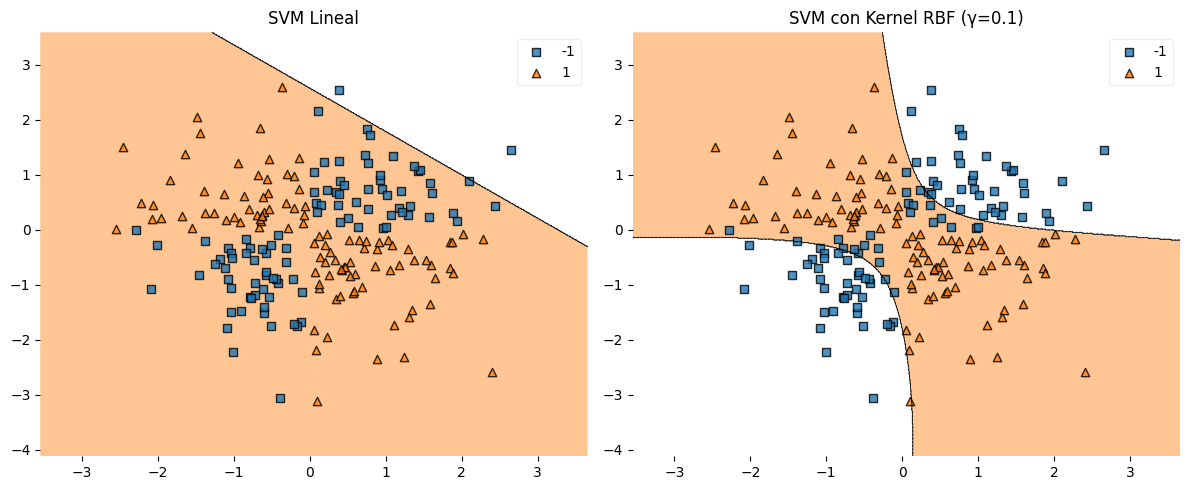

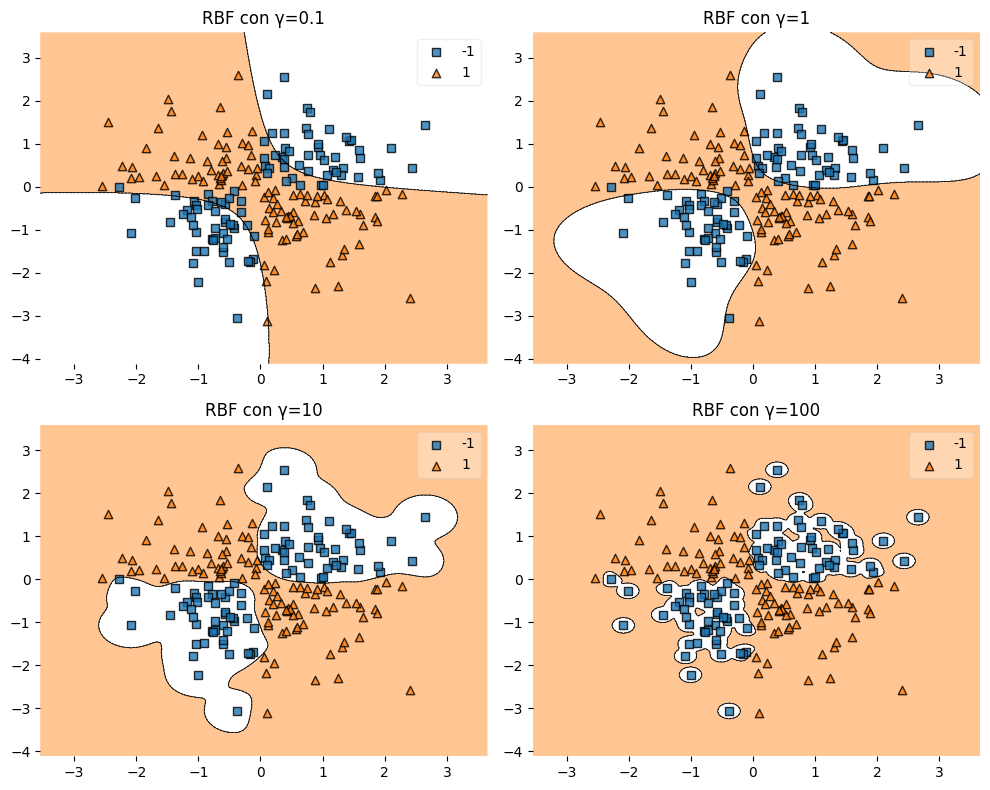

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Generar datos XOR (no linealmente separables)
np.random.seed(2023)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# SVM lineal (no funciona bien)
svm_linear = SVC(kernel='linear', random_state=0)
svm_linear.fit(X_xor, y_xor)

# SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)
svm_rbf.fit(X_xor, y_xor)

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SVM lineal
plot_decision_regions(X_xor, y_xor, clf=svm_linear, ax=axes[0])
axes[0].set_title('SVM Lineal')

# SVM RBF
plot_decision_regions(X_xor, y_xor, clf=svm_rbf, ax=axes[1])
axes[1].set_title('SVM con Kernel RBF (γ=0.1)')

plt.tight_layout()
plt.show()

# Efecto del parámetro gamma
gammas = [0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, gamma in enumerate(gammas):
    svm = SVC(kernel='rbf', random_state=0, gamma=gamma, C=1.0)
    svm.fit(X_xor, y_xor)
    
    plot_decision_regions(X_xor, y_xor, clf=svm, ax=axes[idx])
    axes[idx].set_title(f'RBF con γ={gamma}')

plt.tight_layout()
plt.show()


#### Explicación del Código

1. **Datos XOR**: Problema clásico no linealmente separable
2. **`SVC`**: SVM con kernels
   - `kernel`: Tipo de kernel ('linear', 'poly', 'rbf', 'sigmoid')
   - `gamma`: Parámetro del kernel RBF
   - `C`: Parámetro de regularización
3. **Efecto de gamma**:
   - **Gamma pequeño**: Frontera suave, baja varianza, posible subajuste
   - **Gamma grande**: Frontera compleja, alta varianza, posible sobreajuste

#### Parámetros Clave de `SVC`
- **`kernel`**: Tipo de función kernel
- **`gamma`**: Coeficiente para kernels RBF, polinómico y sigmoide
- **`degree`**: Grado para kernel polinómico
- **`coef0`**: Término independiente en kernels polinómico y sigmoide

### Notas de Examen
- **Kernel trick**: Mapeo implícito a espacio de alta dimensión sin calcular transformaciones
- **RBF**: Aproxima cualquier función con gamma suficiente (riesgo de sobreajuste)
- **Gamma (γ)**: Controla la influencia de cada punto de entrenamiento
  - γ pequeño → Radio grande → Más puntos influyen → Decisión más suave
  - γ grande → Radio pequeño → Menos puntos influyen → Decisión más compleja
- **Trade-off γ-C**:
  - γ pequeño + C pequeño → Subajuste
  - γ grande + C grande → Sobreajuste


## $k-$*NN*

### Teoría

$k-$*NN* clasifica puntos según la mayoría de clases entre sus k vecinos más cercanos:

$$\hat{y} = \text{moda}\{y_i : x_i \in N_k(x)\}$$

Donde $N_k(x)$ son los k puntos más cercanos a $x$.

### Ejemplo

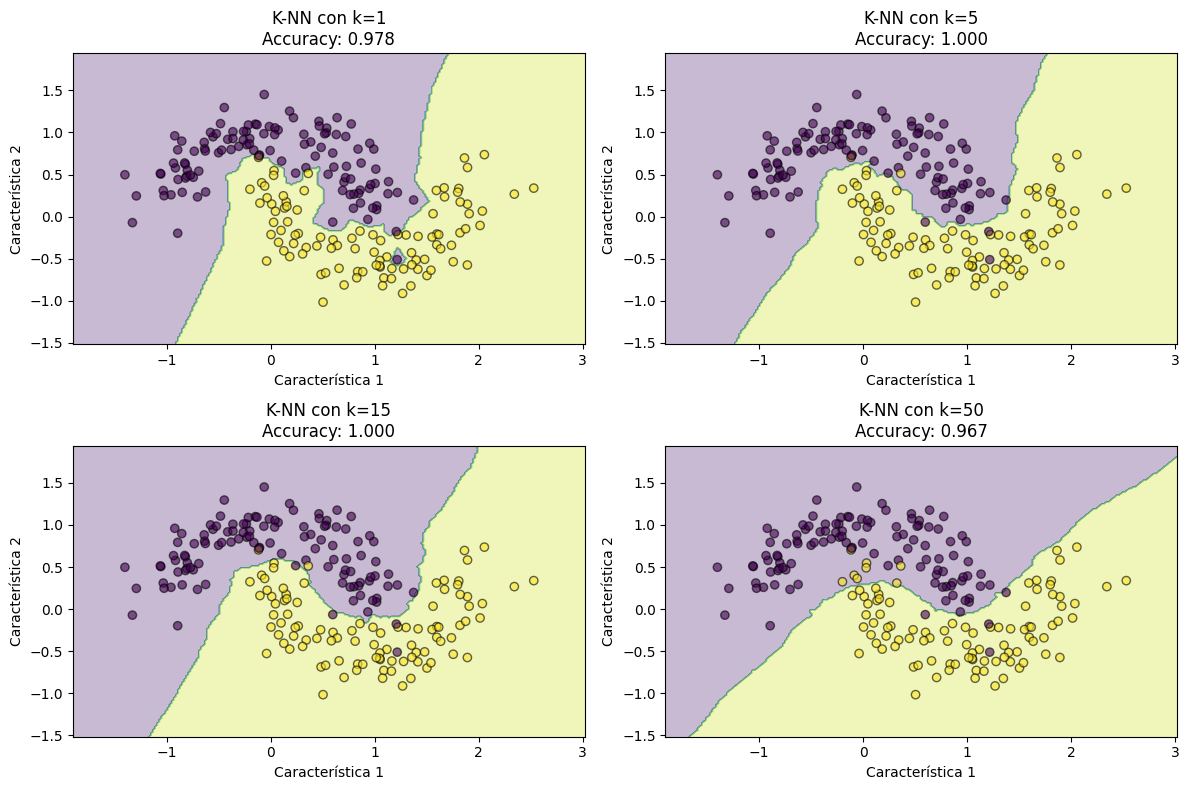

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Datos no lineales
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Comparar diferentes valores de k
k_values = [1, 5, 15, 50]
plt.figure(figsize=(12, 8))

for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Crear malla para visualizar fronteras
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = plt.subplot(2, 2, idx + 1)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.6, edgecolors='k')
    ax.set_title(f'K-NN con k={k}\nAccuracy: {knn.score(X_test, y_test):.3f}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

#### Parámetros Clave de `KNeighborsClassifier`
- **`n_neighbors`**: Número de vecinos (k)
- **`weights`**: Peso de vecinos ('uniform', 'distance')
- **`metric`**: Métrica de distancia ('euclidean', 'manhattan', 'minkowski')
- **`p`**: Parámetro de potencia para métrica Minkowski

### Notas de Examen
- **K-NN**:
  - Algoritmo **perezoso** (no aprende durante entrenamiento)
  - Sensible a la **escala** de características (necesita normalización)
  - **k pequeño** → Alta varianza → Sobreajuste
  - **k grande** → Alto sesgo → Subajuste

## Árboles de Decisión y Random Forest

#### Teoría

- **Árbol de decisión**: Divide recursivamente el espacio de características
- **Random Forest**: Conjunto de árboles con bagging y selección aleatoria de características

#### Ejemplo


Accuracy Árbol de Decisión: 0.9778


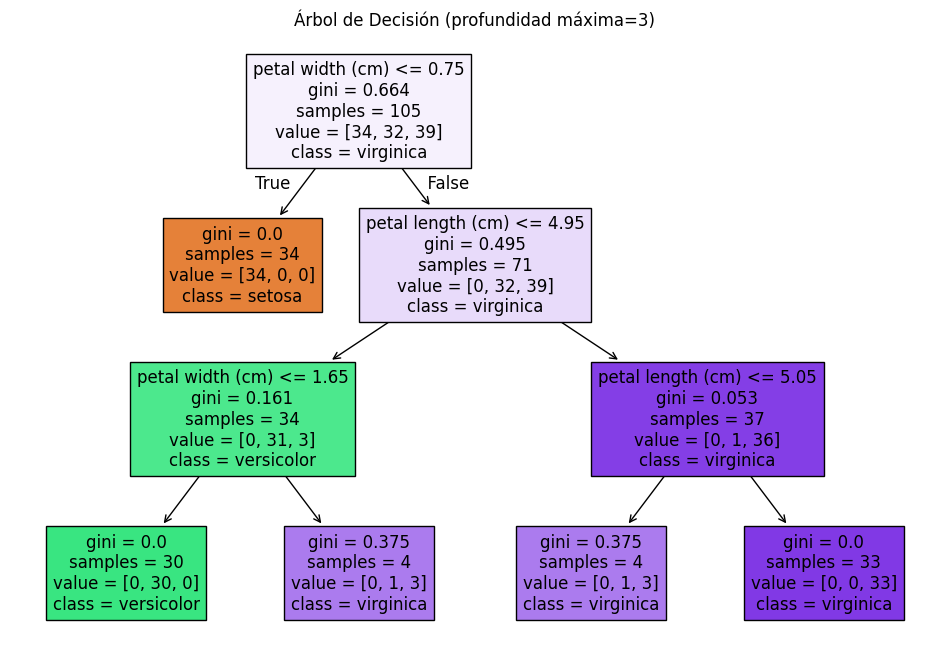

Accuracy Random Forest: 0.9778


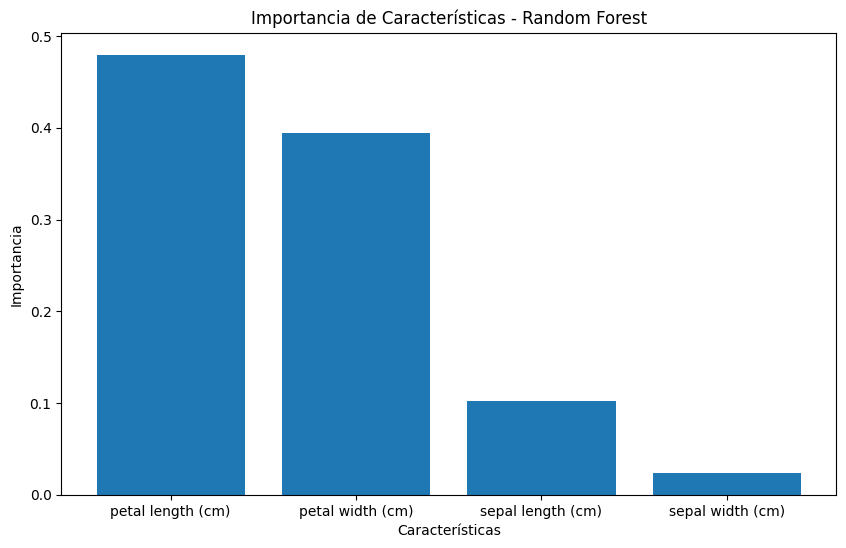

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar datos
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Árbol de decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

print(f"Accuracy Árbol de Decisión: {dt.score(X_test, y_test):.4f}")

# Visualizar árbol
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión (profundidad máxima=3)")
plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print(f"Accuracy Random Forest: {rf.score(X_test, y_test):.4f}")

# Importancia de características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

#### Parámetros Clave
**Árbol de Decisión**:
- **`max_depth`**: Profundidad máxima (controla complejidad)
- **`min_samples_split`**: Mínimo muestras para dividir nodo
- **`min_samples_leaf`**: Mínimo muestras en hoja
- **`criterion`**: Función para medir calidad de división ('gini', 'entropy')

**Random Forest**:
- **`n_estimators`**: Número de árboles
- **`max_features`**: Número máximo de características por división
- **`bootstrap`**: Muestreo con reposición

### Notas de Examen
- **Árboles de Decisión**:
  - Interpretables pero **inestables** (pequeños cambios → árbol diferente)
  - **Gini impurity**: $G = 1 - \sum_{i=1}^c p_i^2$
  - **Entropy**: $H = -\sum_{i=1}^c p_i \log_2 p_i$

- **Random Forest**:
  - **Bagging**: Reduce varianza promediando múltiples árboles
  - **Selección aleatoria de características**: Reduce correlación entre árboles
  - **Out-of-bag error**: Error en muestras no usadas para entrenar cada árbol


## Métricas para la Evaluación de la Clasificación

In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Generar datos desbalanceados
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], 
                          random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)
print("\nTP:", cm[1, 1], "FP:", cm[0, 1])
print("FN:", cm[1, 0], "TN:", cm[0, 0])

Matriz de Confusión:
[[230  40]
 [  7  23]]

TP: 23 FP: 40
FN: 7 TN: 230


In [8]:
# Métricas individuales
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")


Accuracy: 0.8433
Precisión: 0.3651
Recall: 0.7667
F1-score: 0.4946


In [9]:
# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       270
           1       0.37      0.77      0.49        30

    accuracy                           0.84       300
   macro avg       0.67      0.81      0.70       300
weighted avg       0.91      0.84      0.87       300



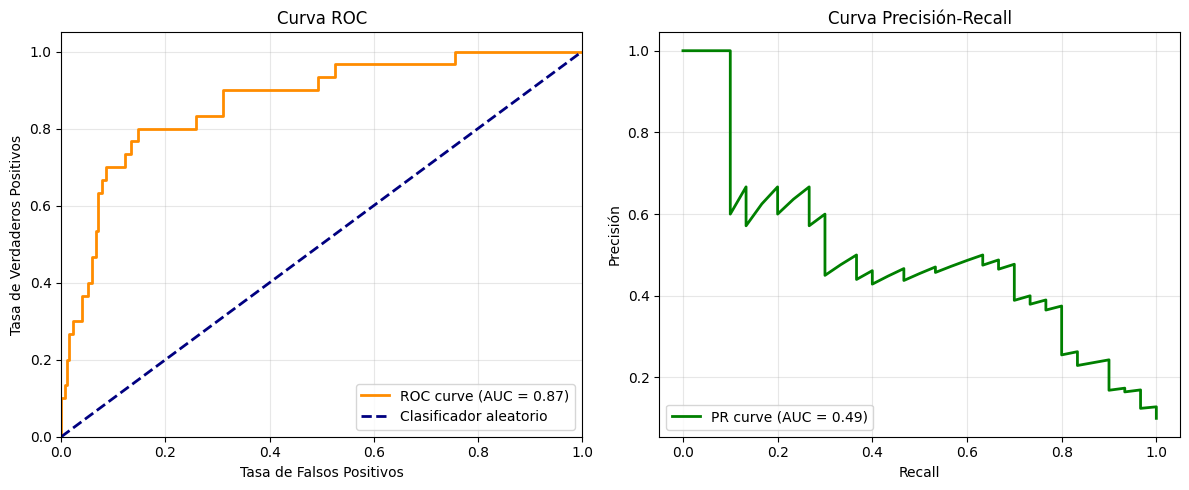

In [10]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Subplot 1: Curva ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: Curva Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
# Umbral óptimo (punto más cercano a esquina superior izquierda en ROC)
distances = np.sqrt((fpr)**2 + (1-tpr)**2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

print(f"\nUmbral óptimo: {optimal_threshold:.4f}")
print(f"FPR en umbral óptimo: {fpr[optimal_idx]:.4f}")
print(f"TPR en umbral óptimo: {tpr[optimal_idx]:.4f}")


Umbral óptimo: 0.4781
FPR en umbral óptimo: 0.1481
TPR en umbral óptimo: 0.8000


### Definiciones Matemáticas
1. **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN}$
2. **Precisión**: $\frac{TP}{TP + FP}$
3. **Recall/Sensibilidad**: $\frac{TP}{TP + FN}$
4. **F1-score**: $2 \times \frac{precisión \times recall}{precisión + recall}$
5. **Especificidad**: $\frac{TN}{TN + FP}$
6. **AUC-ROC**: Área bajo la curva ROC (Receiver Operating Characteristic)
7. **AUC-PR**: Área bajo la curva Precisión-Recall

### Interpretación de Métricas
- **Accuracy**: Buena para clases balanceadas
- **Precisión**: Importante cuando FP son costosos (ej: spam)
- **Recall**: Importante cuando FN son costosos (ej: diagnóstico médico)
- **F1-score**: Balance entre precisión y recall
- **AUC-ROC**: Medida general de rendimiento (independiente del umbral)
- **AUC-PR**: Mejor para datos desbalanceados

### Notas de Examen
- **Matriz de confusión**: Herramienta fundamental para diagnóstico de errores
- **Accuracy paradox**: Accuracy alto puede engañar en datos desbalanceados
- **Curva ROC**: Muestra trade-off entre TPR y FPR
  - AUC = 0.5 → Clasificador aleatorio
  - AUC = 1.0 → Clasificador perfecto
- **Curva PR**: Mejor para evaluar con datos desbalanceados
- **Umbral de decisión**: Puede ajustarse según costos de FP/FN


## Clasificación Multiclase con Dígitos

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
                           accuracy_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
digits = load_digits()
X, y = digits.data, digits.target

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Número de clases: {len(np.unique(y))}")

Forma de X: (1797, 64)
Forma de y: (1797,)
Número de clases: 10


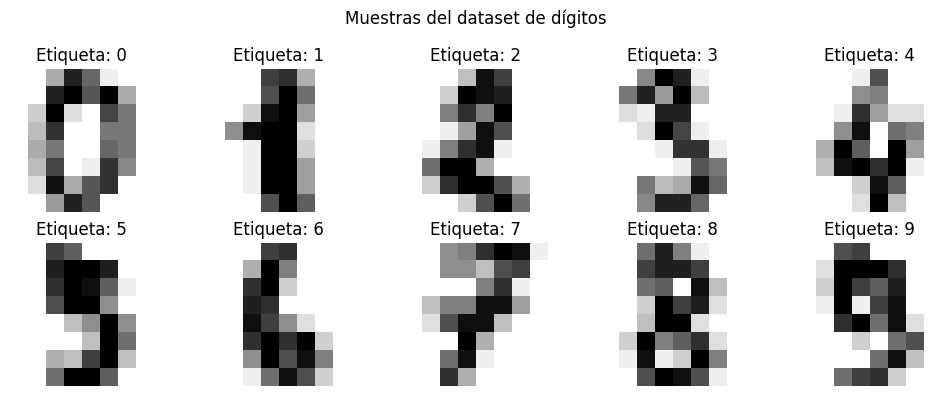

In [13]:
# Visualizar algunas muestras
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f'Etiqueta: {digits.target[i]}')
    ax.axis('off')
plt.suptitle('Muestras del dataset de dígitos')
plt.tight_layout()
plt.show()

In [14]:
# Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Comparar múltiples modelos
models = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'SVM Lineal': SVC(kernel='linear', random_state=42),
    'SVM RBF': SVC(kernel='rbf', random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred
    }
    print(f"{name}: Accuracy = {accuracy:.4f}")


Regresión Logística: Accuracy = 0.9796
SVM Lineal: Accuracy = 0.9796
SVM RBF: Accuracy = 0.9815


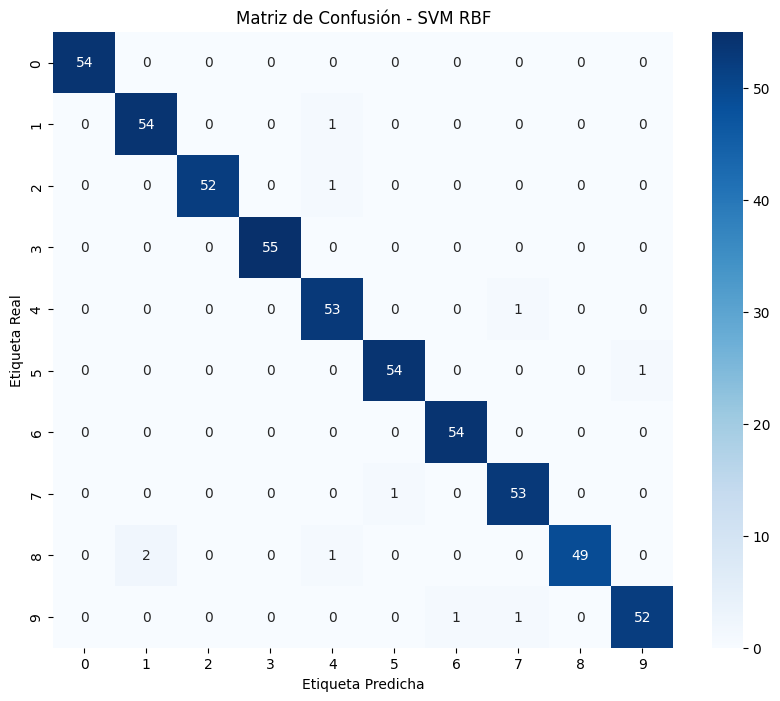

In [15]:
# Matriz de confusión para el mejor modelo
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


In [16]:
# Reporte detallado
print(f"\nReporte de clasificación para {best_model_name}:")
print(classification_report(y_test, y_pred_best, 
                          target_names=[str(i) for i in digits.target_names]))


Reporte de clasificación para SVM RBF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.98      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        54
           7       0.96      0.98      0.97        54
           8       1.00      0.94      0.97        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540




Número de errores: 10
Tasa de error: 0.0185


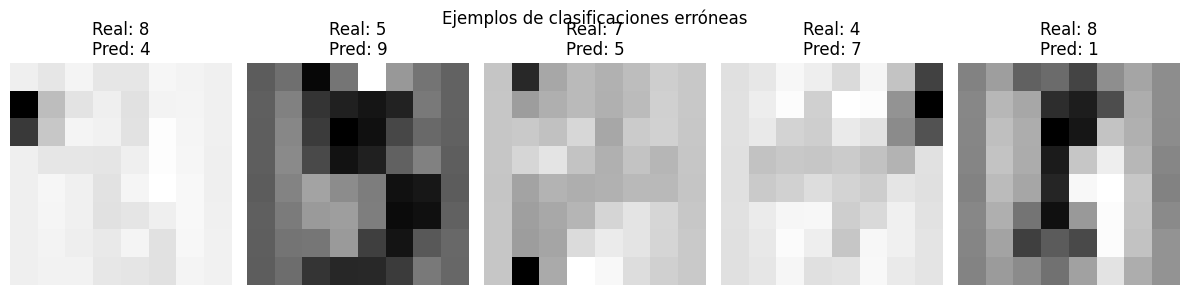

In [17]:
# Análisis de errores
errors = (y_pred_best != y_test)
if errors.any():
    print(f"\nNúmero de errores: {errors.sum()}")
    print(f"Tasa de error: {errors.sum()/len(y_test):.4f}")
    
    # Mostrar algunos errores
    error_indices = np.where(errors)[0][:5]
    
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, idx in enumerate(error_indices):
        img = X_test[idx].reshape(8, 8)
        axes[i].imshow(img, cmap='binary')
        axes[i].set_title(f'Real: {y_test[idx]}\nPred: {y_pred_best[idx]}')
        axes[i].axis('off')
    plt.suptitle('Ejemplos de clasificaciones erróneas')
    plt.tight_layout()
    plt.show()

### Estrategias para Multiclase
1. **One-vs-Rest (OvR)**: Un clasificador por clase vs todas las demás
2. **One-vs-One (OvO)**: Un clasificador por cada par de clases
3. **Multiclase nativa**: Algoritmos que manejan múltiples clases directamente

### Consideraciones para Examen
1. **Escalado de características**: Crucial para SVM y K-NN
2. **Balance de clases**: Usar `class_weight` o técnicas de muestreo
3. **Métricas adecuadas**: Accuracy para balanceado, F1 para desbalanceado
4. **Validación cruzada**: Especialmente importante con pocos datos
5. **Curvas de aprendizaje**: Diagnóstico de sobre/subajuste

## Preguntas Típicas de Examen

### Teóricas
1. **Diferencias entre regresión logística y SVM lineal**
   - RL: Probabilístico, maximiza verosimilitud
   - SVM: Determina hiperplano de máximo margen

2. **Ventajas/desventajas de Random Forest vs Árboles individuales**
   - Ventajas: Menos sobreajuste, más robusto, mide importancia de características
   - Desventajas: Menos interpretable, más lento, más memoria

3. **Cómo elegir entre precisión y recall**
   - Precisión: Cuando FP son costosos (spam)
   - Recall: Cuando FN son costosos (diagnóstico médico)

### Prácticas
1. **Interpretar matriz de confusión**
2. **Calcular métricas a partir de TP, FP, FN, TN**
3. **Explicar efecto de hiperparámetros (C, gamma, k, max_depth)**
4. **Diagnosticar sobre/subajuste con curvas de aprendizaje**
5. **Seleccionar modelo según características del problema**

### Ejercicio de Cálculo
Dada la siguiente matriz de confusión:
```
          Predicción
          0   1
Real 0  85  15
     1   5  95
```

Calcular:
- Accuracy: $(85+95)/(85+15+5+95) = 180/200 = 0.9$
- Precisión clase 1: $95/(95+15) = 95/110 ≈ 0.8636$
- Recall clase 1: $95/(95+5) = 95/100 = 0.95$
- F1-score clase 1: $2×(0.8636×0.95)/(0.8636+0.95) ≈ 0.905$
